In [16]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
from math import log, e
import math
from sklearn.utils import shuffle
import os
import pickle
from scipy.stats import iqr

In [34]:
df = pd.read_csv('../Data/data_3/corrected',header=None)
len(df)

311029

In [35]:
df.head(10)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
5,0,udp,private,SF,105,146,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
6,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,0.30,0.30,0.30,0.00,0.0,0.0,0.0,0.0,normal.
7,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
8,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
9,0,tcp,http,SF,223,185,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,normal.


In [36]:

print('>', bin_width)

> 0.0


In [37]:
for i in range(1,42):
    vals = set(list(df[i]))
    print(len(vals), df[i].dtype)
    if str(df[i].dtype) == 'float64' :
        bins = 20
        labels=list(range(0,20))
        df[i] = pd.cut(df[i], bins,labels=labels)
        print('>',set(df[i]))
    
    

2504 int64
9202 int64
2 int64
3 int64
4 int64
18 int64
5 int64
2 int64
24 int64
2 int64
3 int64
21 int64
12 int64
4 int64
5 int64
1 int64
2 int64
2 int64
502 int64
471 int64
94 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
93 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
94 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
97 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
79 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
100 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
87 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
256 int64
256 int64
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [38]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0,0,0,0,...,254,19,0,0,0,0,0,0,0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,19,0,0,0,0,0,0,0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,19,0,0,0,0,0,0,0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,19,0,0,0,0,0,0,0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,19,0,0,0,0,0,0,0,snmpgetattack.
5,0,udp,private,SF,105,146,0,0,0,0,...,255,19,0,0,0,0,0,0,0,snmpgetattack.
6,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,5,5,5,0,0,0,0,0,normal.
7,0,udp,private,SF,105,146,0,0,0,0,...,253,19,0,0,0,0,0,0,0,normal.
8,0,udp,private,SF,105,146,0,0,0,0,...,254,19,0,0,0,0,0,0,0,snmpgetattack.
9,0,tcp,http,SF,223,185,0,0,0,0,...,255,19,0,0,0,0,0,0,0,normal.


In [39]:
df = df.rename(columns = {41:'tag'})

In [40]:
for i in set(df['tag']) :
    _list = list(df['tag'])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : mscan. | count : 1053
Class : processtable. | count : 759
Class : nmap. | count : 84
Class : loadmodule. | count : 2
Class : udpstorm. | count : 2
Class : named. | count : 17
Class : ftp_write. | count : 3
Class : imap. | count : 1
Class : back. | count : 1098
Class : guess_passwd. | count : 4367
Class : portsweep. | count : 354
Class : pod. | count : 87
Class : saint. | count : 736
Class : phf. | count : 2
Class : ps. | count : 16
Class : buffer_overflow. | count : 22
Class : snmpguess. | count : 2406
Class : multihop. | count : 18
Class : worm. | count : 2
Class : smurf. | count : 164091
Class : sendmail. | count : 17
Class : perl. | count : 2
Class : httptunnel. | count : 158
Class : teardrop. | count : 12
Class : xlock. | count : 9
Class : satan. | count : 1633
Class : snmpgetattack. | count : 7741
Class : xsnoop. | count : 4
Class : sqlattack. | count : 2
Class : ipsweep. | count : 306
Class : neptune. | count : 58001
Class : rootkit. | count : 13
Class : normal. | count :

In [64]:
df.head(10)

,id,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,tag
0,1,0,udp,private,SF,105,146,0,0,0,...,254,19,0,0,0,0,0,0,0,normal.
1,2,0,udp,private,SF,105,146,0,0,0,...,254,19,0,0,0,0,0,0,0,normal.
2,3,0,udp,private,SF,105,146,0,0,0,...,254,19,0,0,0,0,0,0,0,normal.
3,4,0,udp,private,SF,105,146,0,0,0,...,254,19,0,0,0,0,0,0,0,snmpgetattack.
4,5,0,udp,private,SF,105,146,0,0,0,...,254,19,0,0,0,0,0,0,0,snmpgetattack.
5,6,0,udp,private,SF,105,146,0,0,0,...,255,19,0,0,0,0,0,0,0,snmpgetattack.
6,7,0,udp,domain_u,SF,29,0,0,0,0,...,3,5,5,5,0,0,0,0,0,normal.
7,8,0,udp,private,SF,105,146,0,0,0,...,253,19,0,0,0,0,0,0,0,normal.
8,9,0,udp,private,SF,105,146,0,0,0,...,254,19,0,0,0,0,0,0,0,snmpgetattack.
9,10,0,tcp,http,SF,223,185,0,0,0,...,255,19,0,0,0,0,0,0,0,normal.


## Add in id


In [41]:
# add in id
new_col = list(range(1,len(df)+1))
df.insert(
    loc=0, 
    column='id', 
    value=new_col
)


In [52]:
normal_class = 'normal.'

In [44]:
# there are 3 classes 
# taking the majority class as normal 
# Take samples from minority class 'draw' the class(es) with minimum number of points as anomalous
# this assumption has been done in CompreX


normal_df = pd.DataFrame(df[df['tag']=='normal.'],copy=True)
len(normal_df)

60593

In [45]:
# get anomalies
tmp_df = pd.DataFrame(df[df['tag']!='normal.'],copy=True)
len(tmp_df)

250436

In [46]:
num_anom = int(0.05*(len(normal_df)))

anomalies_df = tmp_df.sample(num_anom) 


In [47]:
len(anomalies_df)


3029

In [48]:
data_df = pd.DataFrame(normal_df,copy=True)
data_df = data_df.append(anomalies_df,ignore_index=True)

In [49]:

data_df = shuffle(data_df)

In [50]:
len(data_df)

63622

In [53]:
l1 = len(data_df[data_df['tag']==normal_class])
l2 = len(data_df)
l1 = l2-l1
print('Percentage of Anomalies :',  (l1/l2)*100 )

Percentage of Anomalies : 4.760931753167143


### Exploring the attributes


In [54]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [55]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    for i in range(1,num_cols-2):
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

In [56]:
attr_entropy = get_entropies(data_df)


1 0.6514432484209821
2 0.3183364466727722
3 0.04177401837225002
4 0.6611763812515272
5 0.749117603038664
6 0
7 0.00683423195373216
8 0
9 0.009673282179686084
10 0.001991186280324979
11 0.9132919840787033
12 0.003046774879093414
13 0.005012335932419604
14 0.0006505408294775514
15 0.0012036848113683616
16 0.0034867645959164124
17 0
18 0.016212280801479368
19 0
20 0.00027348907307275046
21 0.019646475630021
22 0.5160611139225059
23 0.5655707207671354
24 0.020107338272120245
25 0.01951229857036766
26 0.02507884896313598
27 0.025023011747560553
28 0.050699962637623906
29 0.046598133525171975
30 0.44357345496771633
31 0.5768235784419041
32 0.40378016667806144
33 0.22971271892839532
34 0.08325023661349248
35 0.3044476914538904
36 0.08367807433268655
37 0.01629883756253707
38 0.010884433137730574
39 0.04317418939601878
40 0.02628906429795351


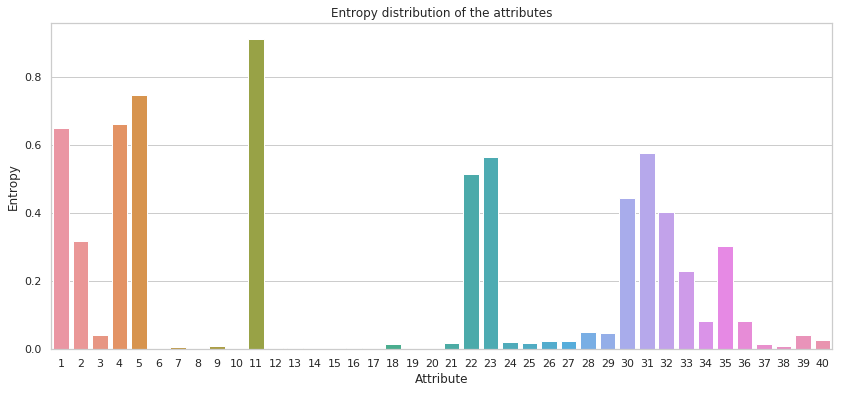

In [57]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(attr_entropy.keys()), y=list(attr_entropy.values()))
plt.xlabel('Attribute')
plt.ylabel('Entropy')
plt.title('Entropy distribution of the attributes')
plt.show()

## Filter attributes by threshold
### lb =0.05
### ub =0.95


In [67]:

lb = 0.0000000005
ub = 0.9999999999
attr_list = []
for k,v in attr_entropy.items():
    if v > 0 and v < 1:
        attr_list.append(k)
        

In [68]:
len(attr_list)

36

In [76]:
valid_attr = ['id']
valid_attr.extend(attr_list)
valid_attr.append('tag')
data_df = data_df[valid_attr]

## Explore Arity of the domains

In [69]:
def get_domain_arity(df,attr_list):
    domain_arity = {a: len(set(df[a])) for a in attr_list}
    return domain_arity

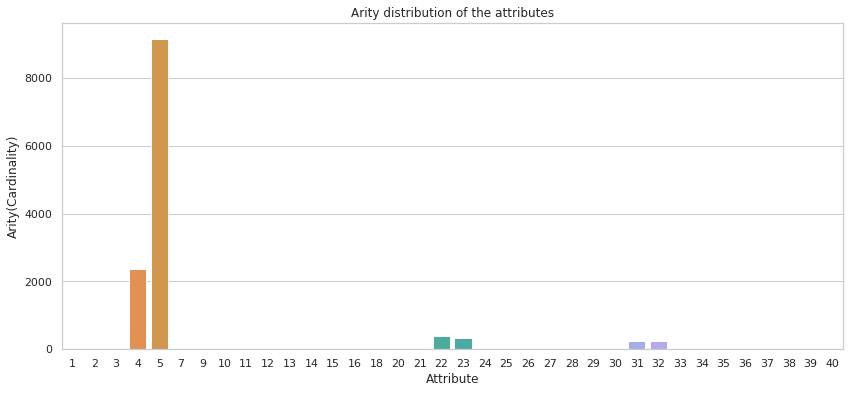

In [70]:

domain_arity = get_domain_arity(data_df,attr_list)
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(domain_arity.keys()), y=list(domain_arity.values()))
plt.xlabel('Attribute')
plt.ylabel('Arity(Cardinality)')
plt.title('Arity distribution of the attributes')
plt.show()  

In [72]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]


def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}

    for col in cols:

        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}

        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[col] = len(id2val_dict)

    domain_dims = []
    domain_dims_res = {}

    for col in list(df.columns):
        if col in domain_dims_dict.keys():
            print(col)
            domain_dims_res[col] = domain_dims_dict[col]
            domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [73]:
# Save the data ina numpy array
_tmp = data_df[data_df['tag'] == normal_class]
_normal = list(_tmp['id'])


_tmp = data_df[(data_df['tag'] != normal_class)]
_anomaly =  list(_tmp['id'])


all_ids = list(data_df['id'])
record_id_dict ={
    'all':all_ids,
    'normal':_normal,
    'anomaly':_anomaly
}

In [75]:
save_dir = '../Data/data_3'

data_df_1 = pd.DataFrame(data_df,copy=True)
try:
    del data_df_1['id']
    del data_df_1['tag']
except:
    pass

# convert all values to int
for c in list(data_df_1.columns):
    data_df_1[c] = data_df_1[c].astype(str)  
cols = list(data_df_1.columns)
data_df_1 = convert_to_ids(data_df_1, cols , save_dir)
data_x = data_df_1.values
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [76]:
OP_PATH = '../Data/data_3'
data_x_file = 'data_3_x.pkl'
record_file = 'data_3_idList.pkl'

f_path_1 = os.path.join(OP_PATH,data_x_file)
f_path_2 = os.path.join(OP_PATH,record_file)

with open(f_path_1,'wb') as fh :
    pickle.dump(data_x, fh,pickle.HIGHEST_PROTOCOL)
    
with open(f_path_2,'wb') as fh :
    pickle.dump(record_id_dict, fh,pickle.HIGHEST_PROTOCOL)